In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [0]:
import os
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
pwd

'/content'

In [8]:
cd drive/My Drive

/content/drive/My Drive


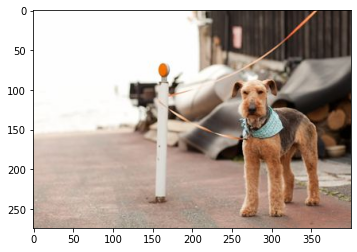

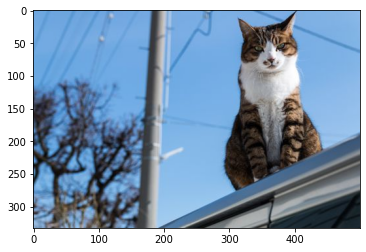

In [9]:
# 自作データの確認
DATADIR = "./dog_cat"
CATEGORIES = ["dog_data", "cat_data"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for image_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, image_name), )
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    


学習データのラベル： 0
学習データのラベル： 0
学習データのラベル： 1
学習データのラベル： 0


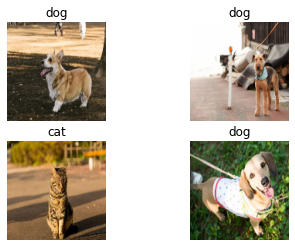

In [10]:
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np
DATADIR = "./dog_cat"
CATEGORIES = ["dog_data", "cat_data"]
IMG_SIZE = 128
training_data = []
def create_training_data():
    for class_num, category in enumerate(CATEGORIES):
        path = os.path.join(DATADIR, category)
        for image_name in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, image_name),)  # 画像読み込み
                img_resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # 画像のリサイズ
                training_data.append([img_resize_array, class_num])  # 画像データ、ラベル情報を追加
            except Exception as e:
                pass
create_training_data()
random.shuffle(training_data)  # データをシャッフル
X_train = []  # 画像データ
y_train = []  # ラベル情報
# データセット作成
for feature, label in training_data:
    X_train.append(feature)
    y_train.append(label)
# numpy配列に変換
X_train = np.array(X_train)
y_train = np.array(y_train)
# データセットの確認
for i in range(0, 4):
    print("学習データのラベル：", y_train[i])
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    plt.title(label = 'dog' if y_train[i] == 0 else 'cat')
    img_array = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)


In [53]:
# モデル作成
import tensorflow as tf
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)            

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
                            optimizer=optimizers.RMSprop(lr=1e-3),
                            metrics=['acc'])

In [0]:
# データの前処理(画像データを0〜１の間に収める)
X_train = X_train / 255

In [56]:
X_train.shape

(100, 128, 128, 3)

In [57]:
model.fit(X_train, y_train, batch_size=20, epochs=20)

Epoch 1/20
100/100 [==============================] - 1s 6ms/step - loss: 0.7048 - acc: 0.4400
Epoch 2/20
100/100 [==============================] - 0s 2ms/step - loss: 0.6941 - acc: 0.4100
Epoch 3/20
100/100 [==============================] - 0s 2ms/step - loss: 0.6930 - acc: 0.5600
Epoch 4/20
100/100 [==============================] - 0s 2ms/step - loss: 0.6942 - acc: 0.5400
Epoch 5/20
100/100 [==============================] - 0s 2ms/step - loss: 0.6957 - acc: 0.4800
Epoch 6/20
100/100 [==============================] - 0s 2ms/step - loss: 0.6940 - acc: 0.5200
Epoch 7/20
100/100 [==============================] - 0s 2ms/step - loss: 0.6948 - acc: 0.4600
Epoch 8/20
100/100 [==============================] - 0s 2ms/step - loss: 0.6934 - acc: 0.5000
Epoch 9/20
100/100 [==============================] - 0s 2ms/step - loss: 0.6944 - acc: 0.5000
Epoch 10/20
100/100 [==============================] - 0s 2ms/step - loss: 0.6956 - acc: 0.3500
Epoch 11/20
100/100 [============================

In [0]:
# test_data(今度はgrob使って読み込み)
from PIL import Image
import os, glob
import numpy as np
from PIL import ImageFile
# IOError: image file is truncated (0 bytes not processed)回避のため
ImageFile.LOAD_TRUNCATED_IMAGES = True

classes = ["dog", "cat"]
num_classes = len(classes)
image_size = 128

X_test  = []
y_test  = []

for index, classlabel in enumerate(classes):
    photos_dir = "./dog_cat/test/" + classlabel
    files = glob.glob(photos_dir + "/*.jpg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        X_test.append(data)
        y_test.append(index)

In [0]:
X_test  = np.array(X_test)
y_test  = np.array(y_test)

In [60]:
y_test

array([0, 0, 0, 0, 1, 1, 1, 1])

In [0]:
X_test = X_test/255

In [62]:
pred = model.predict_classes(X_test)
pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

# 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。


《データ拡張のためのライブラリ》


データ拡張にはalbumentationsなどがあります。

In [0]:
import albumentations as albu
 
def get_augmentation():
    transform = [
        albu.HorizontalFlip(p=1),
    ]
    return albu.Compose(transform)
 
# #画像の読み込み・変換・表示
# img = cv2.imread("image_path")
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# trans = get_augmentation()
 
# img = trans(image=img)['image']
 
# plt.imshow(img);

学習データのラベル： 0
学習データのラベル： 1
学習データのラベル： 1
学習データのラベル： 1


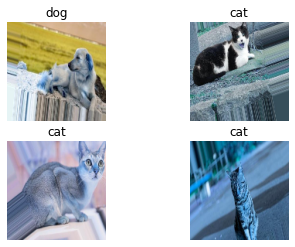

In [31]:
DATADIR = "./dog_cat"
CATEGORIES = ["dog", "cat"]
IMG_SIZE = 128
training_data = []
def create_training_data():
    for class_num, category in enumerate(CATEGORIES):
        path = os.path.join(DATADIR, category)
        for image_name in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, image_name),)  # 画像読み込み
                trans = get_augmentation()
                img_tra = trans(image=img_array)['image']
                img_resize_array = cv2.resize(img_tra, (IMG_SIZE, IMG_SIZE))  # 画像のリサイズ
                training_data.append([img_resize_array, class_num])  # 画像データ、ラベル情報を追加
            except Exception as e:
                pass
create_training_data()
random.shuffle(training_data)  # データをシャッフル
X_train = []  # 画像データ
y_train = []  # ラベル情報
# データセット作成
for feature, label in training_data:
    X_train.append(feature)
    y_train.append(label)
# numpy配列に変換
X_train = np.array(X_train)
y_train = np.array(y_train)
# データセットの確認
for i in range(0, 4):
    print("学習データのラベル：", y_train[i])
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    plt.title(label = 'dog' if y_train[i] == 0 else 'cat')
    img_array = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)

In [33]:
X_train.shape

(100, 128, 128, 3)

In [0]:
# Keras ImageDataGenerator活用
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2
DATA_DIR = './dog_cat/dog'  # データディレクトリ

# まずは犬の画像作成
IMAGE_NAME = 'dog_0110327.jpg'  # 対象画像ファイル
SAVE_DIR = os.path.join(DATA_DIR, 'preview')  # 生成画像の保存先ディレクトリ
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
img_array = cv2.imread(os.path.join(DATA_DIR, IMAGE_NAME),)  # 画像読み込み
img_array = img_array.reshape((1,) + img_array.shape)  # 4次元データに変換（flow()に渡すため）
# 保存先ディレクトリが存在しない場合、作成する。
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)
# flow()により、ランダム変換したイメージのバッチを作成。
# 指定したディレクトリに生成画像を保存する。
i = 0
for batch in datagen.flow(img_array, batch_size=1, save_to_dir=SAVE_DIR, save_prefix='dog', save_format='jpeg'):
    i += 1
    if i == 10:
      break

In [0]:
DATA_DIR = './dog_cat/dog'  # データディレクトリ
IMAGE_NAME = 'dog_1210A1130.jpg'  # 対象画像ファイル
SAVE_DIR = os.path.join(DATA_DIR, 'preview')  # 生成画像の保存先ディレクトリ
img_array = cv2.imread(os.path.join(DATA_DIR, IMAGE_NAME),)  # 画像読み込み
img_array = img_array.reshape((1,) + img_array.shape)  # 4次元データに変換（flow()に渡すため）
# 保存先ディレクトリが存在しない場合、作成する。
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)
# flow()により、ランダム変換したイメージのバッチを作成。
# 指定したディレクトリに生成画像を保存する。
i = 0
for batch in datagen.flow(img_array, batch_size=1, save_to_dir=SAVE_DIR, save_prefix='dog', save_format='jpeg'):
    i += 1
    if i == 10:
      break

In [0]:
DATA_DIR = './dog_cat/dog'  # データディレクトリ
IMAGE_NAME = 'dog_130914211875.jpg'  # 対象画像ファイル
SAVE_DIR = os.path.join(DATA_DIR, 'preview')  # 生成画像の保存先ディレクトリ
img_array = cv2.imread(os.path.join(DATA_DIR, IMAGE_NAME),)  # 画像読み込み
img_array = img_array.reshape((1,) + img_array.shape)  # 4次元データに変換（flow()に渡すため）
# 保存先ディレクトリが存在しない場合、作成する。
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)
# flow()により、ランダム変換したイメージのバッチを作成。
# 指定したディレクトリに生成画像を保存する。
i = 0
for batch in datagen.flow(img_array, batch_size=1, save_to_dir=SAVE_DIR, save_prefix='dog', save_format='jpeg'):
    i += 1
    if i == 10:
      break

In [0]:
DATA_DIR = './dog_cat/dog'  # データディレクトリ
IMAGE_NAME = 'dog_2985.jpg'  # 対象画像ファイル
SAVE_DIR = os.path.join(DATA_DIR, 'preview')  # 生成画像の保存先ディレクトリ
img_array = cv2.imread(os.path.join(DATA_DIR, IMAGE_NAME),)  # 画像読み込み
img_array = img_array.reshape((1,) + img_array.shape)  # 4次元データに変換（flow()に渡すため）
# 保存先ディレクトリが存在しない場合、作成する。
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)
# flow()により、ランダム変換したイメージのバッチを作成。
# 指定したディレクトリに生成画像を保存する。
i = 0
for batch in datagen.flow(img_array, batch_size=1, save_to_dir=SAVE_DIR, save_prefix='dog', save_format='jpeg'):
    i += 1
    if i == 10:
      break

In [0]:
DATA_DIR = './dog_cat/dog'  # データディレクトリ
IMAGE_NAME = 'dog_kainushi.jpg'  # 対象画像ファイル
SAVE_DIR = os.path.join(DATA_DIR, 'preview')  # 生成画像の保存先ディレクトリ
img_array = cv2.imread(os.path.join(DATA_DIR, IMAGE_NAME),)  # 画像読み込み
img_array = img_array.reshape((1,) + img_array.shape)  # 4次元データに変換（flow()に渡すため）
# 保存先ディレクトリが存在しない場合、作成する。
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)
# flow()により、ランダム変換したイメージのバッチを作成。
# 指定したディレクトリに生成画像を保存する。
i = 0
for batch in datagen.flow(img_array, batch_size=1, save_to_dir=SAVE_DIR, save_prefix='dog', save_format='jpeg'):
    i += 1
    if i == 10:
      break

In [0]:
# 次は猫の画像水増し
DATA_DIR = './dog_cat/cat'  # データディレクトリ
IMAGE_NAME = 'cat_1215B1329.jpg'  # 対象画像ファイル
SAVE_DIR = os.path.join(DATA_DIR, 'cat_preview')  # 生成画像の保存先ディレクトリ
img_array = cv2.imread(os.path.join(DATA_DIR, IMAGE_NAME),)  # 画像読み込み
img_array = img_array.reshape((1,) + img_array.shape)  # 4次元データに変換（flow()に渡すため）
# 保存先ディレクトリが存在しない場合、作成する。
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)
# flow()により、ランダム変換したイメージのバッチを作成。
# 指定したディレクトリに生成画像を保存する。
i = 0
for batch in datagen.flow(img_array, batch_size=1, save_to_dir=SAVE_DIR, save_prefix='dog', save_format='jpeg'):
    i += 1
    if i == 10:
      break

In [0]:
DATA_DIR = './dog_cat/cat'  # データディレクトリ
IMAGE_NAME = 'cat_19716064.jpg'  # 対象画像ファイル
SAVE_DIR = os.path.join(DATA_DIR, 'cat_preview')  # 生成画像の保存先ディレクトリ
img_array = cv2.imread(os.path.join(DATA_DIR, IMAGE_NAME),)  # 画像読み込み
img_array = img_array.reshape((1,) + img_array.shape)  # 4次元データに変換（flow()に渡すため）
# 保存先ディレクトリが存在しない場合、作成する。
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)
# flow()により、ランダム変換したイメージのバッチを作成。
# 指定したディレクトリに生成画像を保存する。
i = 0
for batch in datagen.flow(img_array, batch_size=1, save_to_dir=SAVE_DIR, save_prefix='dog', save_format='jpeg'):
    i += 1
    if i == 10:
      break

In [0]:
DATA_DIR = './dog_cat/cat'  # データディレクトリ
IMAGE_NAME = 'cat_458A5701.jpg'  # 対象画像ファイル
SAVE_DIR = os.path.join(DATA_DIR, 'cat_preview')  # 生成画像の保存先ディレクトリ
img_array = cv2.imread(os.path.join(DATA_DIR, IMAGE_NAME),)  # 画像読み込み
img_array = img_array.reshape((1,) + img_array.shape)  # 4次元データに変換（flow()に渡すため）
# 保存先ディレクトリが存在しない場合、作成する。
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)
# flow()により、ランダム変換したイメージのバッチを作成。
# 指定したディレクトリに生成画像を保存する。
i = 0
for batch in datagen.flow(img_array, batch_size=1, save_to_dir=SAVE_DIR, save_prefix='dog', save_format='jpeg'):
    i += 1
    if i == 10:
      break

In [0]:
DATA_DIR = './dog_cat/cat'  # データディレクトリ
IMAGE_NAME = 'cat_DSCN7817.jpg'  # 対象画像ファイル
SAVE_DIR = os.path.join(DATA_DIR, 'cat_preview')  # 生成画像の保存先ディレクトリ
img_array = cv2.imread(os.path.join(DATA_DIR, IMAGE_NAME),)  # 画像読み込み
img_array = img_array.reshape((1,) + img_array.shape)  # 4次元データに変換（flow()に渡すため）
# 保存先ディレクトリが存在しない場合、作成する。
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)
# flow()により、ランダム変換したイメージのバッチを作成。
# 指定したディレクトリに生成画像を保存する。
i = 0
for batch in datagen.flow(img_array, batch_size=1, save_to_dir=SAVE_DIR, save_prefix='dog', save_format='jpeg'):
    i += 1
    if i == 10:
      break

In [0]:
DATA_DIR = './dog_cat/cat'  # データディレクトリ
IMAGE_NAME = 'cat_ganmineko.jpg'  # 対象画像ファイル
SAVE_DIR = os.path.join(DATA_DIR, 'cat_preview')  # 生成画像の保存先ディレクトリ
img_array = cv2.imread(os.path.join(DATA_DIR, IMAGE_NAME),)  # 画像読み込み
img_array = img_array.reshape((1,) + img_array.shape)  # 4次元データに変換（flow()に渡すため）
# 保存先ディレクトリが存在しない場合、作成する。
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)
# flow()により、ランダム変換したイメージのバッチを作成。
# 指定したディレクトリに生成画像を保存する。
i = 0
for batch in datagen.flow(img_array, batch_size=1, save_to_dir=SAVE_DIR, save_prefix='dog', save_format='jpeg'):
    i += 1
    if i == 10:
      break

学習データのラベル： 0
学習データのラベル： 1
学習データのラベル： 1
学習データのラベル： 1


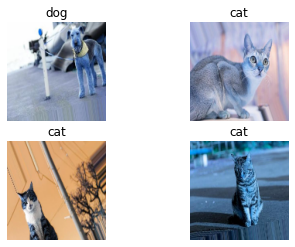

In [63]:
# 学習データの生成
DATADIR = "./dog_cat"
CATEGORIES = ["dog", "cat"]
IMG_SIZE = 128
training_data = []
def create_training_data():
    for class_num, category in enumerate(CATEGORIES):
        path = os.path.join(DATADIR, category)
        for image_name in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, image_name),)  # 画像読み込み
                img_resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # 画像のリサイズ
                training_data.append([img_resize_array, class_num])  # 画像データ、ラベル情報を追加
            except Exception as e:
                pass
create_training_data()
random.shuffle(training_data)  # データをシャッフル
X_train = []  # 画像データ
y_train = []  # ラベル情報
# データセット作成
for feature, label in training_data:
    X_train.append(feature)
    y_train.append(label)
# numpy配列に変換
X_train = np.array(X_train)
y_train = np.array(y_train)
# データセットの確認
for i in range(0, 4):
    print("学習データのラベル：", y_train[i])
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    plt.title(label = 'dog' if y_train[i] == 0 else 'cat')
    img_array = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)

In [64]:
# データの前処理(画像データを0〜１の間に収める)
X_train = X_train / 255
X_train.shape

(100, 128, 128, 3)

In [0]:
print(X_train)

In [74]:
model.fit(X_train, y_train, batch_size=20, epochs=100)

Epoch 1/100
100/100 [==============================] - 0s 2ms/step - loss: 1.5592e-04 - acc: 1.0000
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 1.2600e-04 - acc: 1.0000
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 1.0073e-04 - acc: 1.0000
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 4.3043e-05 - acc: 1.0000
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 1.3347e-04 - acc: 1.0000
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 1.0754e-04 - acc: 1.0000
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 3.4925e-05 - acc: 1.0000
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - loss: 2.3079e-05 - acc: 1.0000
Epoch 9/100
100/100 [==============================] - 0s 2ms/step - loss: 1.7711e-05 - acc: 1.0000
Epoch 10/100
100/100 [==============================] - 0s 2ms/step - loss: 1.3599e-05 - acc: 1.0000

学習データのラベル： 0
学習データのラベル： 0
学習データのラベル： 0
学習データのラベル： 0


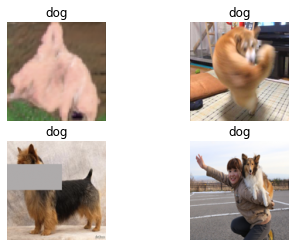

In [72]:
for i in range(0, 4):
    print("学習データのラベル：", y_test[i])
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    plt.title(label = 'dog' if y_test[i] == 0 else 'cat')
    img_array = X_test[i]
    plt.imshow(img_array)

In [75]:
# test_dataをpred
pred = model.predict_classes(X_test)
print(pred)

[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]]


# 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。



# 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。


物体検出の学習を行なうかどうかは任意とします。

In [0]:
%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [0]:
import xml.etree.ElementTree as ET

FILE = './dog_cat/cat_data/cat_1215B1329.xml'

file = open(FILE)
tree = ET.parse(file)
root = tree.getroot()

all_list = []

img_file = root.find('filename').text  # 画像ファイル名を取得

for obj in root.iter('object'):
    cls = obj.find('name').text
    xmlbox = obj.find('bndbox')
    b = [int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text)]

    all_list.append([img_file] + b + [cls])

In [84]:
all_list

[['cat_1215B1329.jpg', 111, 34, 500, 275, 'cat']]

In [0]:
!pip install albumentations

In [0]:
!git clone https://github.com/albumentations-team/albumentations

In [0]:

%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [0]:

def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [0]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [0]:

image = download_image('http://images.cocodataset.org/train2017/000000386298.jpg')

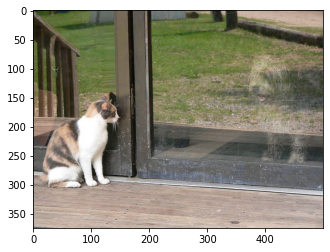

In [118]:
plt.imshow(image)

In [0]:
img = cv2.imread('./dog_cat/cat_data/cat_1215B1329.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
annotations = {'image': img, 'bboxes': [[111, 34, 500, 275]], 'category_id':[0]}
category_id_to_name = {0: 'cat'}

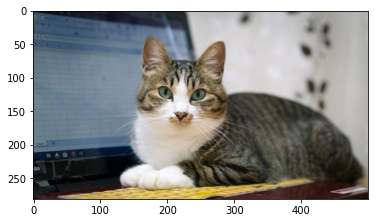

In [124]:
plt.imshow(img)

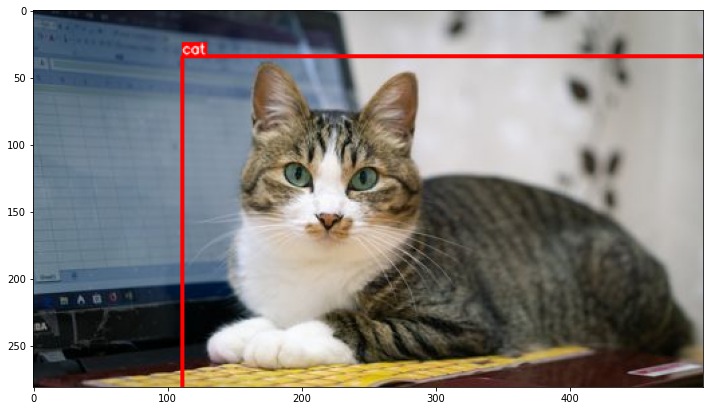

In [143]:
visualize(annotations, category_id_to_name)

In [0]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return A.Compose(aug, A.BboxParams(format='coco', min_area=min_area, 
                                       min_visibility=min_visibility, label_fields=['category_id']))

In [138]:
aug = get_aug([
    A.HorizontalFlip(p=0.5),
    A.RandomSizedBBoxSafeCrop(width=448, height=336, erosion_rate=0.2),
    A.RGBShift(p=0.5),
    A.Blur(blur_limit=11, p=0.5),
    A.RandomBrightness(p=0.5),
    A.CLAHE(p=0.5),
])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

AttributeError: ignored